In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras 

2023-10-03 16:06:36.548941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 16:06:36.931532: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 16:06:36.933337: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 16:06:38.073281: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pathlib
data_dir='Dataset/PlantVillage_potato/'
test_dir='Dataset/potato_test/'
data_dir=pathlib.Path(data_dir)
test_dir=pathlib.Path(test_dir)
data_dir

PosixPath('Dataset/PlantVillage_potato')

In [3]:
os.listdir(data_dir)

['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']

In [4]:
image_count=len(list(data_dir.glob('*/*.JPG')))
image_count

2152

In [5]:
early_blight=list(data_dir.glob('Potato___Early_blight/*'))
early_blight[:5]

[PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/fd59ab68-681f-4aca-ae95-6f73bf8caad7___RS_Early.B 7118.JPG'),
 PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/be89d35f-e382-4b1c-95e8-af88d969d306___RS_Early.B 6758.JPG'),
 PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/c17c36ed-c36f-42d4-812d-3b17158063d3___RS_Early.B 8398.JPG'),
 PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/26f15c9c-5cbf-49c8-ac4e-c5b15d03e319___RS_Early.B 9022.JPG'),
 PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/10a3920b-dd04-406d-8bbd-f92f221e4dee___RS_Early.B 7035.JPG')]

In [6]:
k=PIL.Image.open(str(early_blight[2]))

In [7]:
potato_disease_dict={
    'early_blight':list(data_dir.glob('Potato___Early_blight/*')),
    'late_blight':list(data_dir.glob('Potato___Late_blight/*')),
    'healthy':list(data_dir.glob('Potato___healthy/*'))
}

In [8]:
potato_disease_test_dict={
    'early_blight':list(test_dir.glob('potato_early/*')),
    'late_blight':list(test_dir.glob('potato_late/*')),
    'healthy':list(test_dir.glob('potato_healthy/*'))
}

In [9]:
potato_disease_test_dict

{'early_blight': [PosixPath('Dataset/potato_test/potato_early/potato_early_1120_gblr_3.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_736.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_683.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_235.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1050_gblr_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1120_ccrp_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1020_ccrp_2.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_329.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1121_ccrp_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1151_ccrp_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1118_gblr_3.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1148_ccrp_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1020_ccrp_4.JPG'),
  

In [15]:
potato_lablels_dict={
    'early_blight':0,
    'late_blight':1,
    'healthy':2,
    
}

In [16]:
potato_lablels_dict

{'early_blight': 0, 'late_blight': 1, 'healthy': 2}

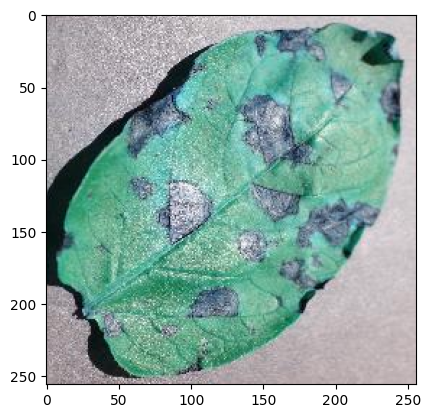

In [17]:
import random
img1=str(potato_disease_dict['early_blight'][random.randint(0,1000)])
img1=cv2.imread(img1)
plt.imshow(img1)

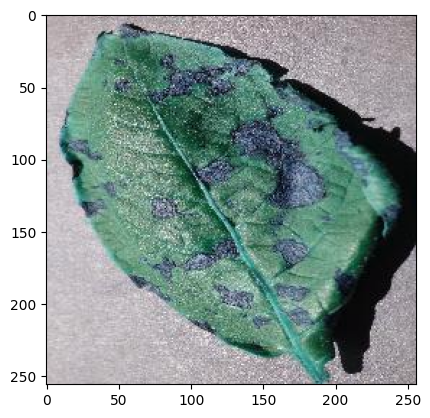

In [18]:
img2=str(potato_disease_test_dict['early_blight'][random.randint(0,1000)])
img2=cv2.imread(img2)
plt.imshow(img2)

In [19]:
X,y=[],[]
X_test,y_test=[],[]
for disease_name, images in potato_disease_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(potato_lablels_dict[disease_name])

for disease_name, images in potato_disease_test_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X_test.append(resized_img)
        y_test.append(potato_lablels_dict[disease_name])

In [20]:
img_height,img_width=X[0].shape[:2]

In [21]:
X[0].shape

(180, 180, 3)

In [22]:
X=np.array(X)
y=np.array(y)

X_test=np.array(X_test)
y_test=np.array(y_test)


from sklearn.utils import shuffle
X_test, y_test = shuffle(X_test, y_test, random_state=42)


In [23]:
y_test[:10]

array([1, 2, 1, 0, 2, 1, 2, 2, 0, 1])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42,shuffle=True)

In [25]:
print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

1721
431
1721
431


In [26]:
X_train_scaled=X_train/255
X_valid_scaled=X_valid/255
X_test_scaled=X_test/255

In [27]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes=5
augmented_model=Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=X[0].shape),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomContrast(0.5),
    layers.experimental.preprocessing.RandomFlip(),    
])


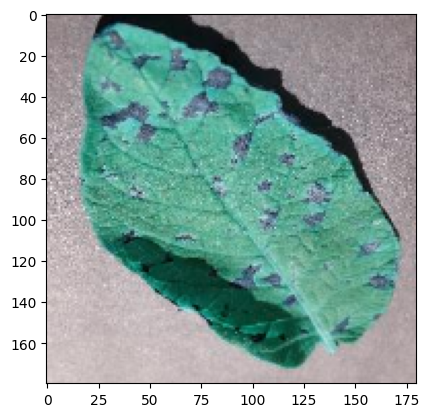

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

In [24]:
#plt.imshow(augmented_model(X)[0].numpy().astype("uint8"))

In [25]:
num_classes=5
model=Sequential([
    augmented_model,
    layers.Conv2D(32,3, padding='same', input_shape=X[0].shape, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [27]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5,restore_best_weights=True,start_from_epoch=5)

In [28]:
history=model.fit(X_train_scaled,y_train,
          validation_data=(X_valid_scaled,y_valid),
          batch_size=64,
          epochs=50,
          callbacks=[es]
         )

Epoch 1/50
27/27 [==============================] - 40s 1s/step - loss: 0.9745 - accuracy: 0.4759 - val_loss: 0.9202 - val_accuracy: 0.4548
Epoch 2/50
27/27 [==============================] - 38s 1s/step - loss: 0.8703 - accuracy: 0.5230 - val_loss: 0.8184 - val_accuracy: 0.7123
Epoch 3/50
27/27 [==============================] - 43s 2s/step - loss: 0.8313 - accuracy: 0.5816 - val_loss: 0.7873 - val_accuracy: 0.7216
Epoch 4/50
27/27 [==============================] - 45s 2s/step - loss: 0.6291 - accuracy: 0.7455 - val_loss: 0.8202 - val_accuracy: 0.6845
Epoch 5/50
27/27 [==============================] - 53s 2s/step - loss: 0.5331 - accuracy: 0.7990 - val_loss: 0.4566 - val_accuracy: 0.8190
Epoch 6/50
27/27 [==============================] - 48s 2s/step - loss: 0.5044 - accuracy: 0.7897 - val_loss: 0.5570 - val_accuracy: 0.7633
Epoch 7/50
27/27 [==============================] - 47s 2s/step - loss: 0.4277 - accuracy: 0.8274 - val_loss: 0.4753 - val_accuracy: 0.8190
Epoch 8/50
27/27 [==

In [29]:
model.save('models/potato_leaf_disease_classification_model3.keras')
model.save('models/potato_leaf_disease_classification_model3.h5')

/home/fansan/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


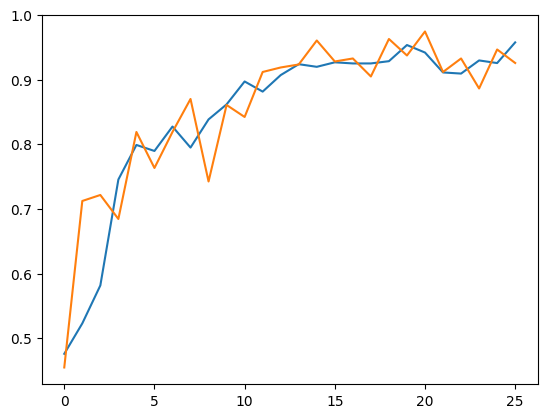

In [30]:
plt.plot(history.epoch,history.history["accuracy"])
plt.plot(history.epoch,history.history["val_accuracy"])
plt.show()

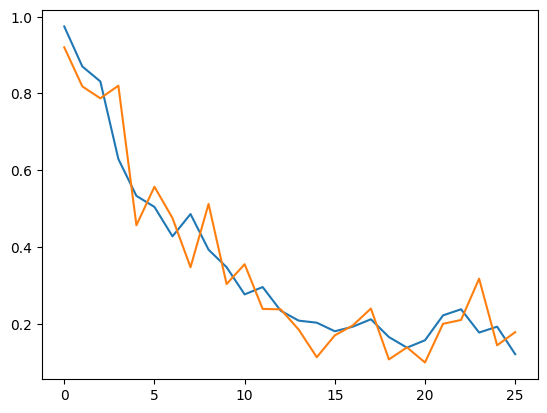

In [31]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [ ]:
import gc
gc.collect()

In [29]:
model=keras.models.load_model('models/potato_leaf_disease_classification_model.keras')

In [35]:
model.evaluate(X_valid_scaled,y_valid)

14/14 [==============================] - 3s 193ms/step - loss: 0.0728 - accuracy: 0.9745


[0.07277295738458633, 0.9744779467582703]

In [37]:
test_evaluation=model.evaluate(X_test_scaled,y_test)

2023-10-01 23:05:34.220478: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2522534400 exceeds 10% of free system memory.


203/203 [==============================] - 42s 209ms/step - loss: 0.2794 - accuracy: 0.9032


In [32]:
#predictions=[np.argmax(model.predict(np.array([X_test_scaled[i]])))==y_test[i] for i in range(len(X_test_scaled))]

In [39]:
gc.collect()

0

In [51]:
predictions=model.predict(X_test_scaled)

2023-10-01 23:22:35.329103: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2522534400 exceeds 10% of free system memory.


203/203 [==============================] - 42s 208ms/step


In [41]:
predictions2=[np.argmax(predictions[i]) for i in range(len(X_test_scaled))]
predictions3=[np.argmax(predictions[i])==y_test[i] for i in range(len(X_test_scaled))]

In [42]:
np.argmax(model.predict(np.array([X_test_scaled[4]])))

1/1 [==============================] - 0s 36ms/step


2

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf=confusion_matrix(predictions2,y_test)

In [44]:
cf

array([[2109,  152,   90],
       [ 110, 2049,  258],
       [   0,   18, 1702]])

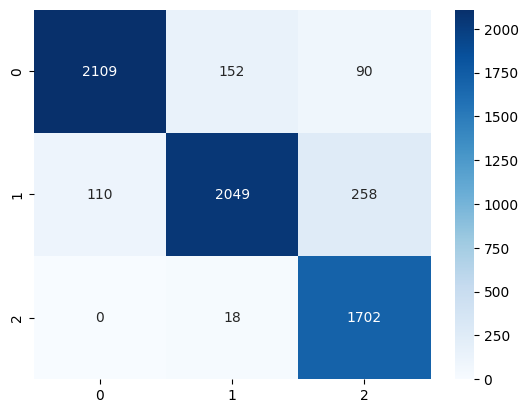

In [45]:
import seaborn as sb
sb.heatmap(cf, annot=True,fmt='', cmap='Blues');

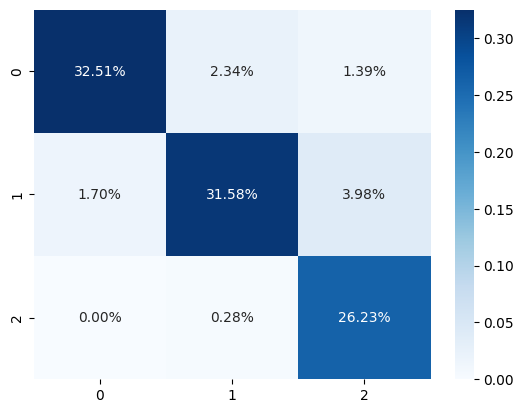

In [46]:
import seaborn as sb
sb.heatmap(cf/np.sum(cf), annot=True,fmt='.2%', cmap='Blues');

In [50]:
del X_test,X_train,X_valid
gc.collect()

NameError: name 'X_test' is not defined